In [49]:
#Importing Required Libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
import tensorflow.keras as k

import numpy as np
import matplotlib.pyplot as plt
print('Tensorflow Version:',tf.__version__)

Tensorflow Version: 2.1.0


### Data Pre-processing

In [50]:
# input data
(x_train, _), (x_test, _) = mnist.load_data()

In [51]:
#Normalize all values between 0 and 1 and flatten the 28x28 images into vectors of size 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

#adding some noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

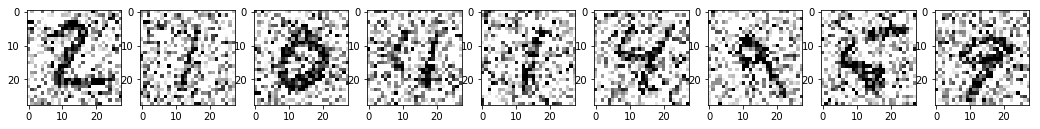

In [52]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

In [53]:
# Buiding and compiling the Model

model = k.models.Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='same'))
          
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1,(3,3), activation='sigmoid', padding='same'))

model.compile(optimizer='adadelta',
             loss='binary_crossentropy')
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
up_sampling2d_12 (UpSampling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 32)       

In [59]:
model.fit(x_train_noisy, x_train,
        epochs=100,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.1847 - val_loss: 0.1833
Epoch 2/100
60000/60000 [==============================] - 131s 2ms/sample - loss: 0.1837 - val_loss: 0.1823
Epoch 3/100
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.1827 - val_loss: 0.1814
Epoch 4/100
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.1818 - val_loss: 0.1805
Epoch 5/100
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.1809 - val_loss: 0.1796
Epoch 6/100
60000/60000 [==============================] - 129s 2ms/sample - loss: 0.1800 - val_loss: 0.1787
Epoch 7/100
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.1792 - val_loss: 0.1779
Epoch 8/100
60000/60000 [==============================] - 132s 2ms/sample - loss: 0.1784 - val_loss: 0.1771
Epoch 9/100
60000/60000 [==============================] - 131s 2ms/sample - l

In [60]:
model.evaluate(x_test_noisy, x_test)

10000/10000 [==============================] - 6s 629us/sample - loss: 0.1435


0.14349293534755705

In [61]:
model.save('denoising_autoencoder.model')

INFO:tensorflow:Assets written to: denoising_autoencoder.model\assets


In [62]:
no_noise_img = model.predict(x_test_noisy)

### **Data Visualization using Matplotlib**

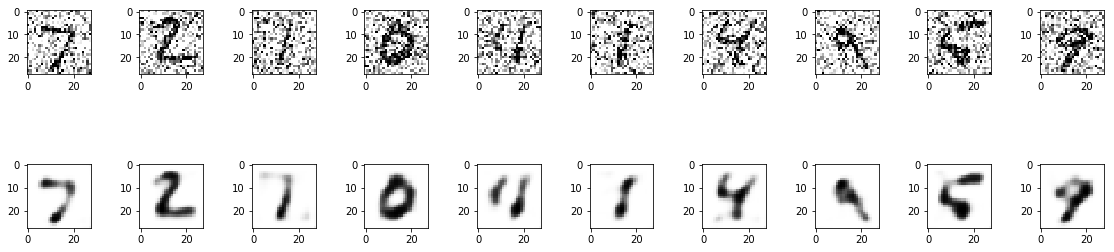

In [63]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

### Question & Answers

In [44]:
# Question: Do you get the same results if you run the notebook multiple times without changing any parameters?
""" NO, the result varies"""

' NO, the result varies'

In [45]:
# Question: What happens if we increase the batch_size?
"""
Batch size impacts learning significantly. 
What happens when you put a batch through your network is that you average the gradients. 
If the batch size is big enough, then it will provide a stable enough estimate of what the gradient of the full dataset would be. 
The lower you go, the less accurate your estimate will be, however in some cases these noisy gradients can actually help escape local minima. 
If it is too low, then the network weights can just jump around if our data is noisy and it might be unable to learn, or it converges very slowly, thus negatively impacting total computation time.
"""

'\nBatch size impacts learning significantly. \nWhat happens when you put a batch through your network is that you average the gradients. \nIf the batch size is big enough, then it will provide a stable enough estimate of what the gradient of the full dataset would be. \nThe lower you go, the less accurate your estimate will be, however in some cases these noisy gradients can actually help escape local minima. \nIf it is too low, then the network weights can just jump around if our data is noisy and it might be unable to learn, or it converges very slowly, thus negatively impacting total computation time.\n'

In [65]:
# Question: What other activation functions could we use instead of sigmoid?
"""
Other than Sigmoid we can go for either "Tanh" or "ReLU"
"""

'\nOther than Sigmoid we can go for either "Tanh" or "ReLU"\n'

In [47]:
# Question: Why is the DCGAN output much better than Vanilla GAN? Elaborate
"""
GAN: 
    A Generative Adversarial Network (GAN) takes the idea of using a generator model to generate fake examples and discriminator model that tries to decide if the image it receives is a fake (i.e. from the generator) or a real sample.
DCGAN:    
    A Deep Convolution GAN (DCGAN) does something very similar, but specifically focusses on using Deep Convolutional networks in place of those fully connected networks. Conv nets in general find areas of correlation within an image, that is, they look for spatial correlations. 
    This means a DCGAN would likely be more fitting for image/video data.

"""

In [71]:
# Question: Write up a summary explaining how your program works 
""" Here is the summary of the program
        1.	First and foremost: Importing the libraries
        2.	Loading MNIST dataset
        3.	Preparing the Data
        5.	Preprocessing on the data
        6.	Split my model into training and test sets. Then adding some noise.
        7.	Displaying images with noise
        8.	Building and Compile the model.
        9.	Train the model
        10.	Model elavuation
        11.	Data Visualization using Matplotlib
             	 Display original(with noise) image
             	 Display reconstructed (after noise removed) image
"""

' Here is the summary of the program\n        1.\tFirst and foremost: Importing the libraries\n        2.\tLoading MNIST dataset\n        3.\tPreparing the Data\n        5.\tPreprocessing on the data\n        6.\tSplit my model into training and test sets. Then adding some noise.\n        7.\tDisplaying images with noise\n        8.\tBuilding and Compile the model.\n        9.\tTrain the model\n        10.\tModel elavuation\n        11.\tData Visualization using Matplotlib\n             \t Display original(with noise) image\n             \t Display reconstructed (after noise removed) image\n'